# Customer Behavior Analysis  

This project focuses on analyzing customer behavior and preferences using a dataset from Kaggle. The primary objective is to derive actionable insights into customer demographics, purchasing patterns, and engagement levels with the seller company through comprehensive data exploration and visualization.  

**Dataset:** [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

First, we import all the necessary libraries, including Pandas for data processing and Matplotlib for visualization.


In [608]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Business Question Formulation and Analysis  

Customer personality analysis enables businesses to tailor their products and marketing strategies to better address the needs of specific customer segments. For example, instead of broadly marketing a new product to every customer in the database, businesses can identify the segment most likely to purchase the product and focus their marketing efforts on that group.  

Below are the key business questions to be analyzed using the dataset:

1. How does income correlate with the location of purchase?
2. How does the year of birth correlate with the type of product purchased?
3. Which products perform well without the need for marketing campaigns?  

Next, let’s begin by gathering the dataset. The dataset is in CSV format and is separated by tabs.

In [609]:
# Load the dataset into a DataFrame for analysis
df_marketing = pd.read_csv('marketing_campaign.csv', sep='\t')
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Now, let's display a summary of the dataset to understand its structure and contents.  

In [610]:
# Show summary of the dataset
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Now, let's display the descriptive statistics of the dataset to gain a better understanding of the numerical features.  

In [611]:
# Show descriptive statistics of the dataset
df_marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


The dataset reveals the following facts:  

- The oldest customer was born in 1893.  
- The maximum number of children or teenagers a customer has is 2.  
- There is at least one customer who has not purchased a product for a period of 74 days.  
- "Wines" is the most purchased product among all the available products.  
- The most frequently used place for purchasing products is the "Store."

From the data, some rows have an empty 'Income' column, which could cause issues if the data is used for analysis. To address this, there are two options: remove the rows or fill the missing values. Before deciding whether to remove or fill them, it's important to assess the impact of these missing values on the overall dataset.

In [612]:
# Find how many percentages of the data has missing values
missing_values = df_marketing[df_marketing['Income'].isna()].shape[0]
total_values = df_marketing['Income'].shape[0]
percentage_missing = (missing_values / total_values) * 100
percentage_missing

1.0714285714285714

Since the missing values represent only 1% of the data, it is a reasonable decision to remove them, as their impact on the overall dataset is minimal.

In [613]:
# Drop rows with the missing values
df_marketing = df_marketing.dropna(subset=['Income'])

Now, let's examine the distribution of customer income to better understand the income range and its impact on purchasing behavior.

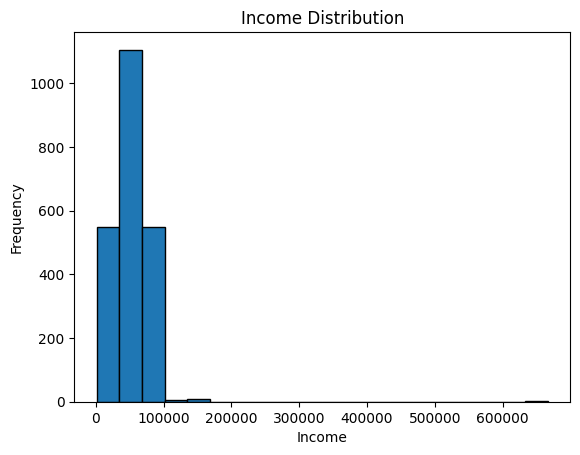

In [614]:
df_marketing['Income'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [615]:
df_marketing[df_marketing['Income'] > 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


The plot is right-shifted due to the presence of outliers in the data. Specifically, the income values are unusually high, with one value being 666,666, which is atypical and skews the distribution. Therefore, it would be prudent to remove these outliers to achieve a more accurate representation of the income distribution.

In [616]:
df_marketing = df_marketing[df_marketing['Income'] < 200000]

In [617]:
# Bin the income data into integer bins
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]
bin_labels = ['0-25k', '25-50k', '50-75k', '75-100k', '100-125k', '125-150k']
df_marketing['Income_bin'] = pd.cut(df_marketing['Income'], bins=bins, labels=bin_labels)
df_marketing['Income_bin'].value_counts()

Income_bin
25-50k      818
50-75k      797
75-100k     346
0-25k       242
100-125k      5
125-150k      0
Name: count, dtype: int64

Let’s now plot the distribution of customer ages for each product category to understand how age varies across different products.

In [618]:
place_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
place_names = ['Web', 'Catalog', 'Store']

df_place_income = df_marketing.groupby('Income_bin')[place_columns].sum()

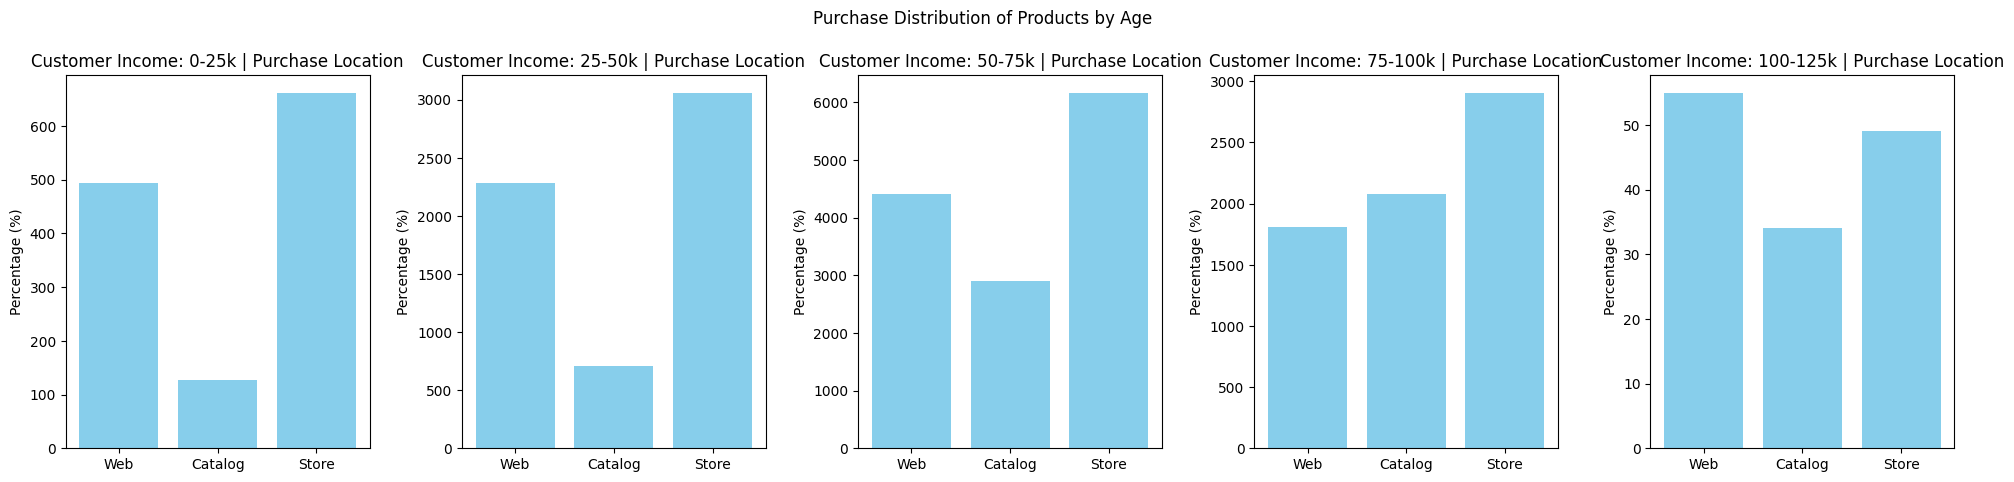

In [619]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration
for ax, index in zip(axes, df_place_income.index):
    x_labels = place_names
    y_values = []
    for pn in place_columns:
        y_values.append(df_place_income.loc[index][pn])
    ax.bar(
        x_labels,
        y_values,
        color='skyblue'
    )
    ax.set_ylabel('Percentage (%)')
    ax.set_title(f'Customer Income: {index} | Purchase Location')
plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.85)
plt.suptitle('Purchase Distribution of Products by Age')
plt.show()

The data shows that purchases are predominantly made in-store. Customers with an income between 0 and 100k prefer buying the product directly from the store, while those with an income above 100k tend to favor purchasing through the web. Additionally, as income increases, customers are more likely to use a catalog to make their purchase.

Let's group the years of birth in the dataset to account for the wide range of variations. In this case, six groups will be used to categorize them.

In [620]:
# Make year birth in bins
bins = np.linspace(df_marketing['Year_Birth'].min(), df_marketing['Year_Birth'].max(), 6).astype(int)
bins_labels = []
for i in range(len(bins) - 1):
    bins_labels.append(f'{bins[i]}-{bins[i+1]}')

df_marketing['Year_Birth_bin'] = pd.cut(df_marketing['Year_Birth'], bins=bins, labels=bins_labels)
df_marketing['Year_Birth_bin'].value_counts()

Year_Birth_bin
1954-1975    1211
1975-1996     688
1934-1954     313
1893-1913       2
1913-1934       0
Name: count, dtype: int64

In [621]:
# Product columns
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
# Product names
product_names = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

# Group by year birth bins and sum the product columns
df_kid_product = df_marketing.groupby('Year_Birth_bin')[product_columns].sum()
df_kid_product

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Year_Birth_bin,,,,,,
1893-1913,770,150,570,111,68,249
1913-1934,0,0,0,0,0,0
1934-1954,124522,8620,61974,13966,9584,16226
1954-1975,384715,31424,192167,43885,32034,52274
1975-1996,166059,18197,115329,25428,18209,28664


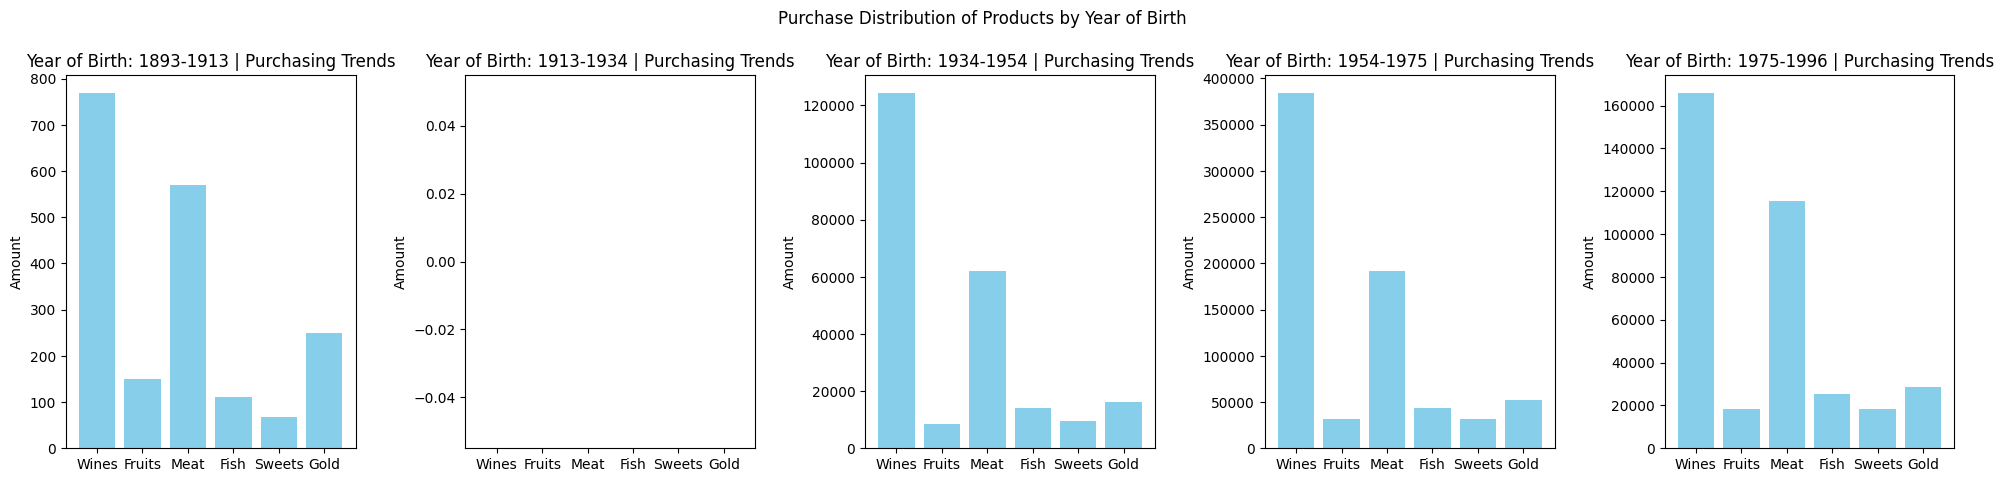

In [622]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes = axes.flatten()
for ax, index in zip(axes, df_kid_product.index):
    x_labels = product_names
    y_values = []
    for pn in product_columns:
        y_values.append(df_kid_product.loc[index][pn])
    ax.bar(
        x_labels,
        y_values,
        color='skyblue'
    )
    ax.set_ylabel('Amount')
    ax.set_title(f'Year of Birth: {index} | Purchasing Trends')
plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.85)
plt.suptitle('Purchase Distribution of Products by Year of Birth')
plt.show()

According to the plot, all customers show a preference for purchasing wine, meat, and gold. The key differences in their behavior lie in their choices for fruits, fish, and sweets. Now, let's generate a new plot excluding wine, meat, and gold.

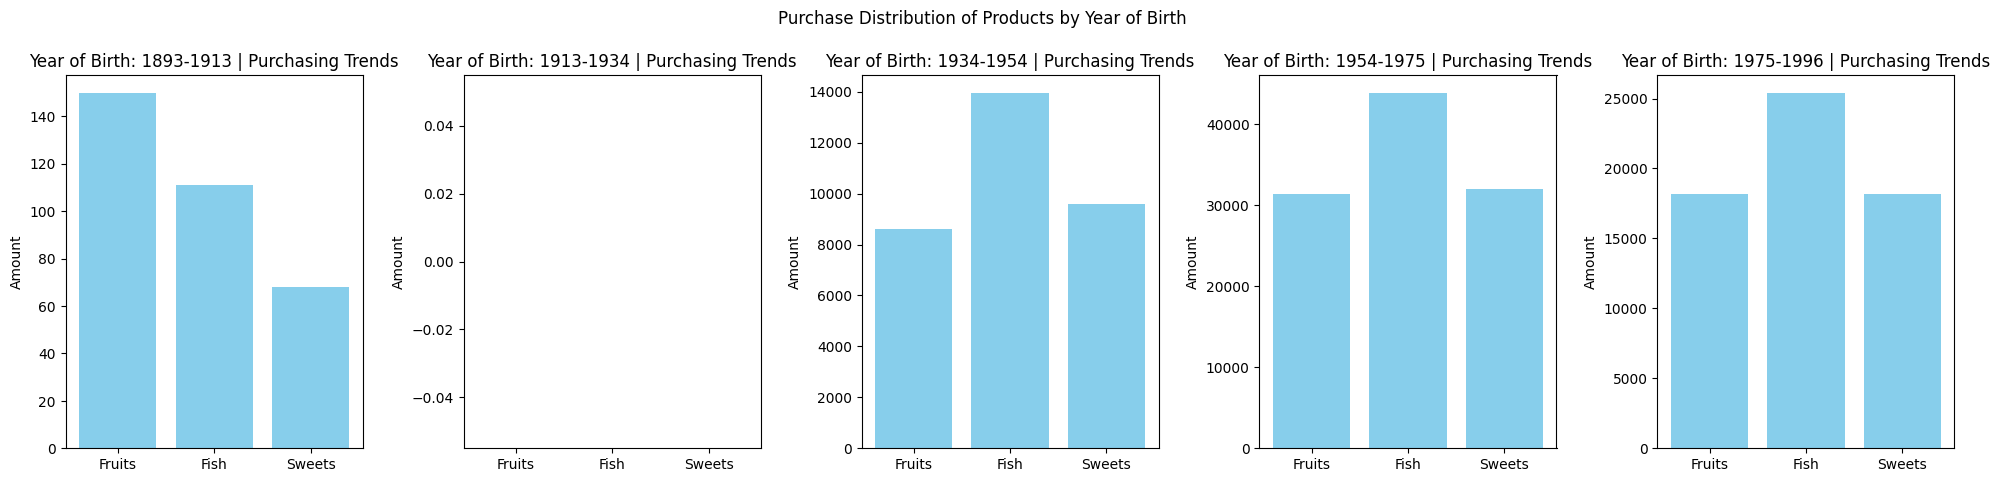

In [623]:
product_columns = ['MntFruits', 'MntFishProducts', 'MntSweetProducts']
product_names = ['Fruits', 'Fish', 'Sweets']

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes = axes.flatten()
for ax, index in zip(axes, df_kid_product.index):
    x_labels = product_names
    y_values = []
    for pn in product_columns:
        y_values.append(df_kid_product.loc[index][pn])
    ax.bar(
        x_labels,
        y_values,
        color='skyblue'
    )
    ax.set_ylabel('Amount')
    ax.set_title(f'Year of Birth: {index} | Purchasing Trends')
plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.85)
plt.suptitle('Purchase Distribution of Products by Year of Birth')
plt.show()

From the plot above, the following observations can be made:

- Customers born between 1893 and 1913 tend to prefer buying fruit, but they show less interest in sweets compared to other groups.
- Customers born between 1934 and 1954, 1954 and 1975, as well as 1975 and 1996, show a strong preference for purchasing fish.

Now, let's list the data of customers who make purchases without the need for a campaign.

In [624]:
# Filter the dataset to include only customers who have not accepted any campaign
df_wo_camp = df_marketing[(df_marketing['AcceptedCmp1'] == 0) & (df_marketing['AcceptedCmp2'] == 0) & (df_marketing['AcceptedCmp3'] == 0) & (df_marketing['AcceptedCmp4'] == 0) & (df_marketing['AcceptedCmp5'] == 0) & (df_marketing['Response'] == 0)]
df_wo_camp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_bin,Year_Birth_bin
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,25-50k,1934-1954
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,50-75k,1954-1975
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,25-50k,1975-1996
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,50-75k,1975-1996
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,50-75k,1954-1975


In [625]:
# Group by product columns and sum the values
df_wo_camp_sum = pd.DataFrame({
    'Wines': df_wo_camp['MntWines'].sum(),
    'Fruits': df_wo_camp['MntFruits'].sum(),
    'Meat': df_wo_camp['MntMeatProducts'].sum(),
    'Fish': df_wo_camp['MntFishProducts'].sum(),
    'Sweets': df_wo_camp['MntSweetProducts'].sum(),
    'Gold': df_wo_camp['MntGoldProds'].sum()
}, index=['Amount'])

df_wo_camp_sum

,Wines,Fruits,Meat,Fish,Sweets,Gold
Amount,350864,36847,203914,51937,36857,60892


Let's now plot the statistical data to visualize the customer behavior for products purchased without the need for a campaign.

<Axes: >

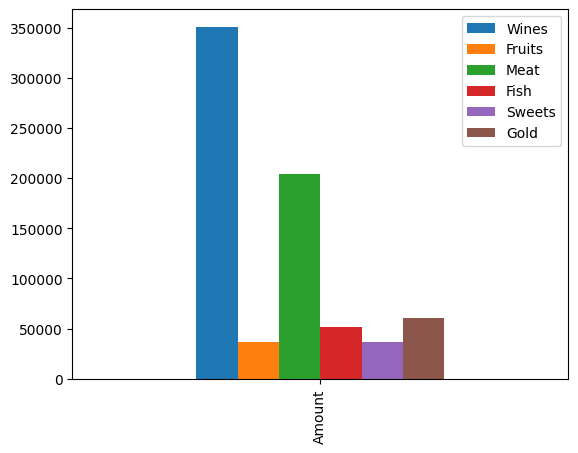

In [626]:
# Plot the sum of products purchased by customers who have not accepted any campaign
df_wo_camp_sum.plot(kind='bar')

Despite being a non-essential food item, wine has the highest sales among the products, surpassing even meat and fruit, which are more critical for the human body. This suggests that consumer preferences may be driven by factors beyond basic nutritional needs, such as lifestyle choices, indulgence, or social influences. It indicates that marketing and cultural trends may play a significant role in shaping purchasing decisions, even for products that are not considered essential for survival.

Thus, based on the analysis above, wine does not require urgent focus in ads or marketing campaigns, as its high sales are already driven by consumer preference, independent of promotional efforts.

Conclusion:
1. In-store campaigns and web campaign marketing efforts should be increased, as they reach a broader customer segmentation.
2. Sweets are particularly popular among younger customers (born after 1913).
3. Wine remain popular products, even without the need for specific campaigns.